In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
import metos3d.petsc_mod as petsc
import data_conversion as dc

In [2]:
## Load data

In [3]:
data_path = r"D:\Bachelorarbeit Data\0000\save"
data = np.load(path.join(data_path, "data.npy"))
a_k = np.abs(np.load(path.join(data_path, "a_k.npy")))
b_k = np.abs(np.load(path.join(data_path, "b_k.npy")))
X = np.load(path.join(data_path, "c.npy"))
land_sea_mask = petsc.read_PETSc_matrix('metos3d\\landSeaMask.petsc')
n1, n2 = np.shape(land_sea_mask.T)
n3 = int(np.amax(land_sea_mask))

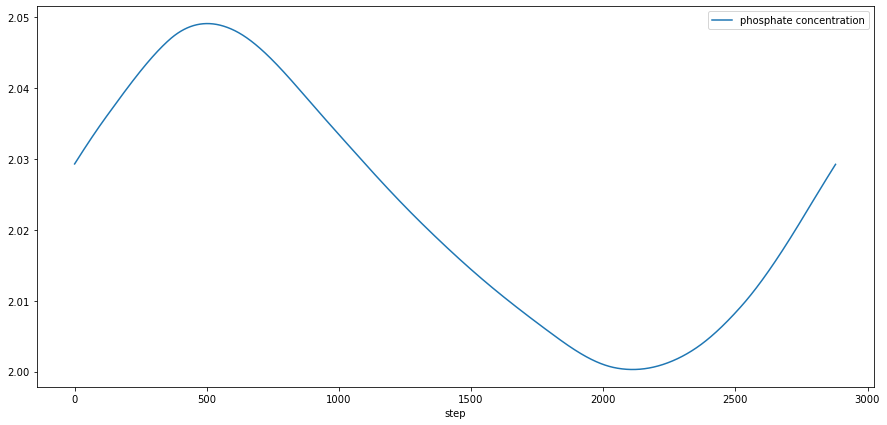

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(data[50], label="phosphate concentration")
ax.set_xlabel("step")
mean = np.full(data[50].shape, np.mean(data[50]))
# ax.plot(mean, label="mean")
ax.legend()
fig.savefig(r"D:\Neuer Ordner\IONOS HiDrive\Uni\Bachelorarbeit\Präsentation\examplepoint_nomean.png")

In [15]:
a_sums = np.sum(np.abs(a_k[:,1:]), axis=0)
b_sums = np.sum(np.abs(b_k[:,1:]), axis=0)
sums = a_sums + b_sums


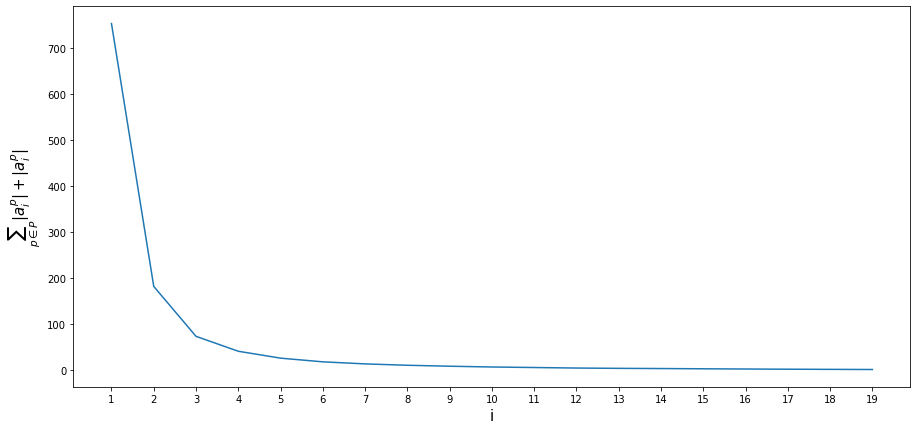

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(range(1,20),sums[:19])
ax.set_xticks(range(1,20))
ax.set_xlabel("i", fontsize=15)
ax.set_ylabel("$\sum_{p \in P} |a_i^p| + |a_i^p|$",fontsize=15)
fig.savefig(r"D:\Neuer Ordner\IONOS HiDrive\Uni\Bachelorarbeit\Präsentation\coef_sum_small.png")
plt.show()

(52749,)


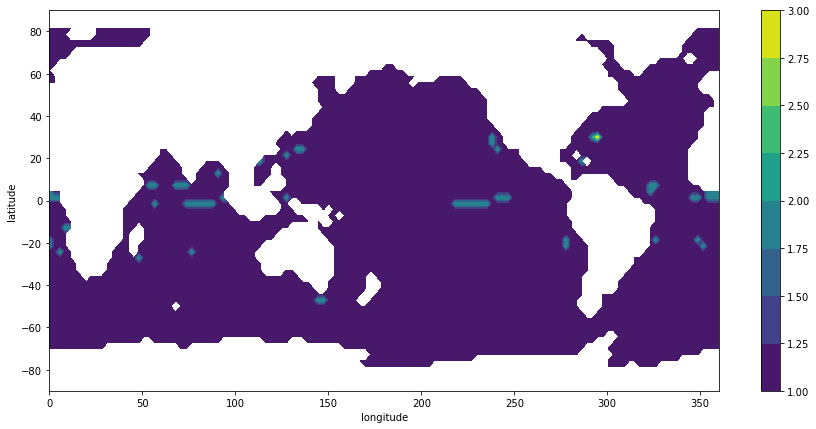

In [28]:

file_name = "Coefficient_index.png";
X [:,0] = 0
plot_data = np.abs(X[:,:len(X[0])//2])
plot_data = np.argmax(plot_data, axis = 1)
print(plot_data.shape)
fig, ax = plt.subplots(figsize= (15,7))
long, lat = np.meshgrid(np.linspace(-90, 90, n2), np.linspace(0,360,n1))
plot_data,_,_,_ = petsc.reshape_vector_to_3d(land_sea_mask, plot_data)
plot = ax.contourf(lat, long, plot_data[:,:,0], )
plt.xlabel('longitude')
plt.ylabel('latitude')
fig.colorbar(plot, ax=ax)
fig.savefig("D:\\Neuer Ordner\\IONOS HiDrive\\Uni\\Bachelorarbeit\\Präsentation\\" + file_name  )
plt.show()

In [6]:
ak_3d = dc.convert_2d_to_4d(a_k, land_sea_mask)
bk_3d = dc.convert_2d_to_4d(b_k, land_sea_mask)
data_3d = dc.convert_2d_to_4d(data, land_sea_mask)


In [7]:
def extract_a_0(X):
    if not X is None:
        return X[0]
    else:
        return np.nan


extract_a_0 = np.vectorize(extract_a_0, otypes="f")

a0_3d = extract_a_0(ak_3d)

In [8]:
def get_max_coef(ak, bk):
    """Find the maximal coefficient for each 0 with 1 if it is a_k of 2 if it is b_k and also the index, meaning the k of a_k or b_k"""
    if ak is None or bk is None:
        return np.nan, 0, np.nan
    else:
        max_a = np.amax(ak[1:])
        max_a_idx = np.argmax(ak[1:]) +1
        max_b = np.amax(bk)
        max_b_idx = np.argmax(bk)
        if max_a >= max_b:
            return max_a, 1, max_a_idx
        else:
            return max_b, 2, max_b_idx


get_max_coef = np.vectorize(get_max_coef)

max_coef, coef_type, coef_idx = get_max_coef(ak_3d, bk_3d)

max_rel = max_coef/ a0_3d

In [9]:
def filter_nan(X):
    return X[X == X]


In [10]:
for i in range(15):
    smaller = np.count_nonzero(filter_nan(coef_idx[:,:,i] ) <= 1 )
    all_p = filter_nan(coef_idx[:,:,i]).size
    print(smaller, all_p, smaller / all_p * 100)

smaller = np.count_nonzero(filter_nan(coef_idx) <= 1)
all_p = filter_nan(coef_idx).size
print(smaller, all_p, smaller / all_p * 100)


4381 4448 98.49370503597122
4205 4392 95.74225865209472
4229 4334 97.57729580064606
4188 4259 98.33294200516553
4078 4164 97.9346781940442
3980 4088 97.35812133072407
3895 4026 96.74615002483856
3802 3940 96.49746192893402
3645 3822 95.36891679748823
3450 3679 93.77548246806198
3321 3558 93.3389544688027
3136 3324 94.34416365824309
2322 2453 94.6596004891969
1520 1589 95.65764631843928
652 673 96.87964338781575
50804 52749 96.31272630760773


In [11]:
savePath = r"D:\Neuer Ordner\IONOS HiDrive\Uni\Bachelorarbeit\Arbeit\graphics\coef_idx"

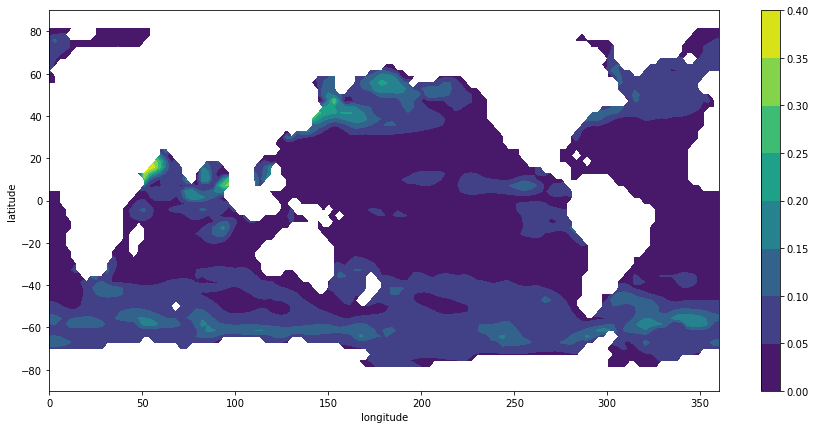

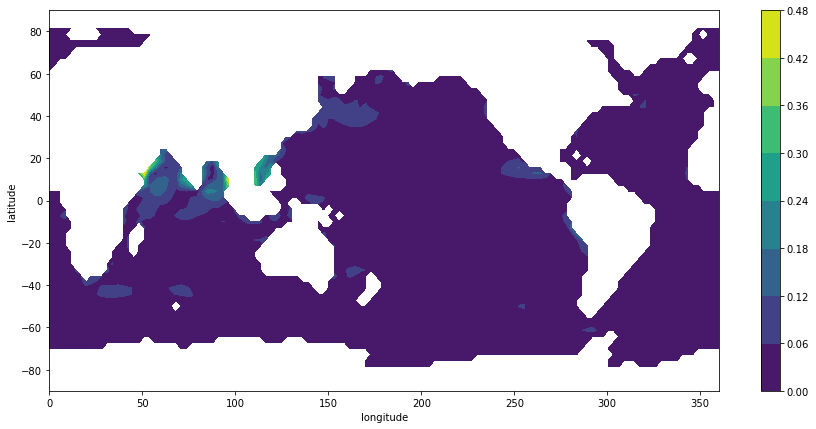

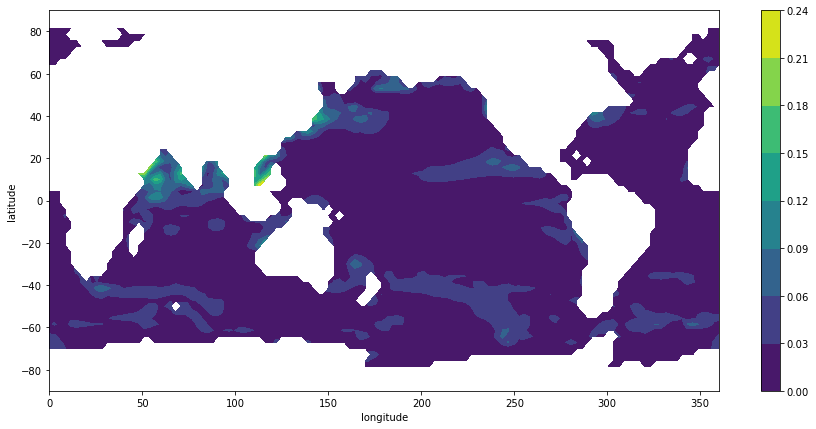

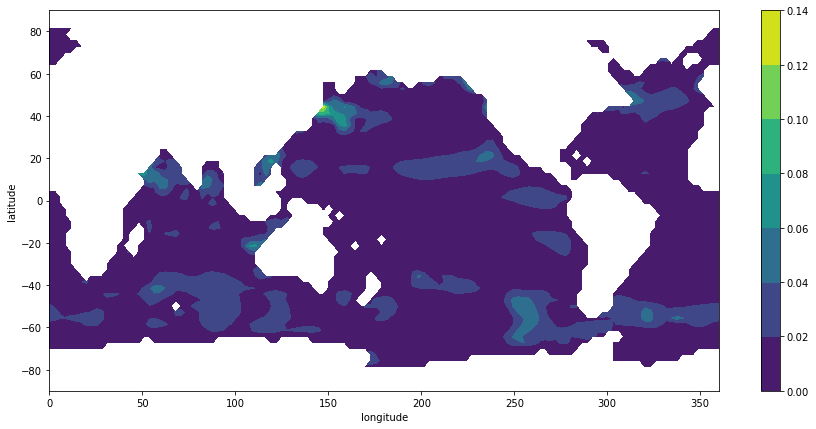

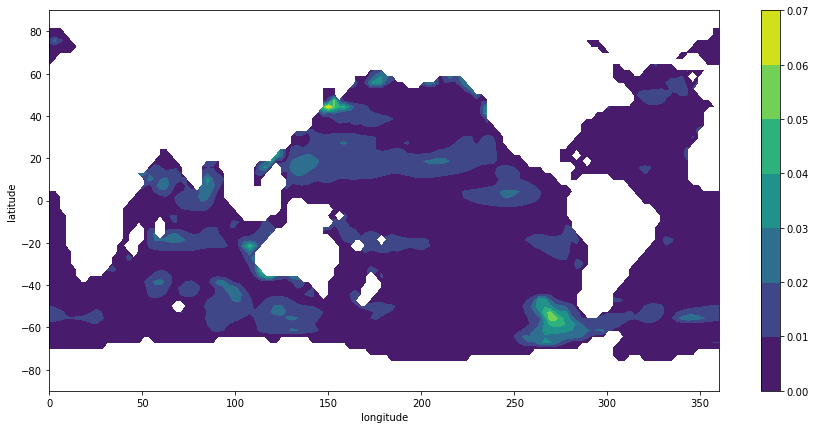

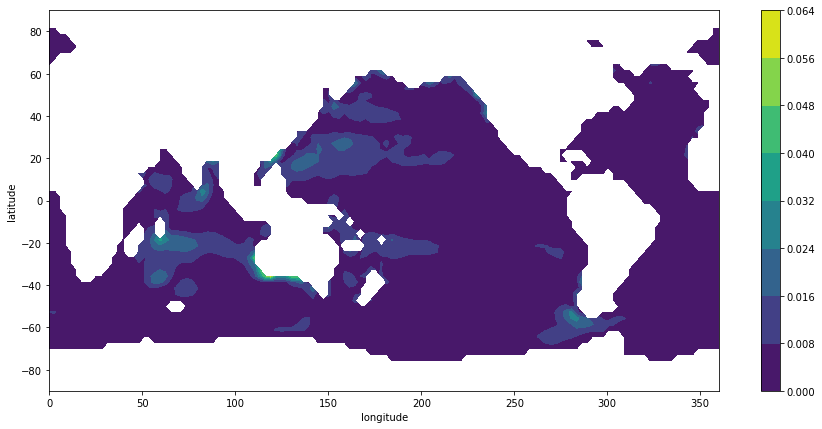

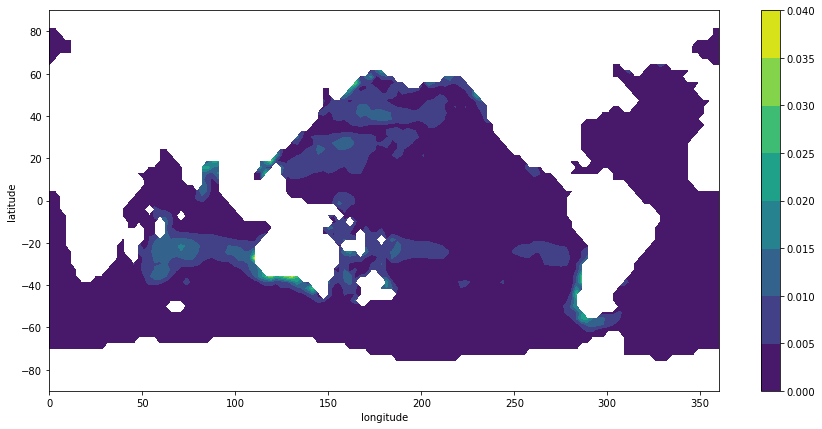

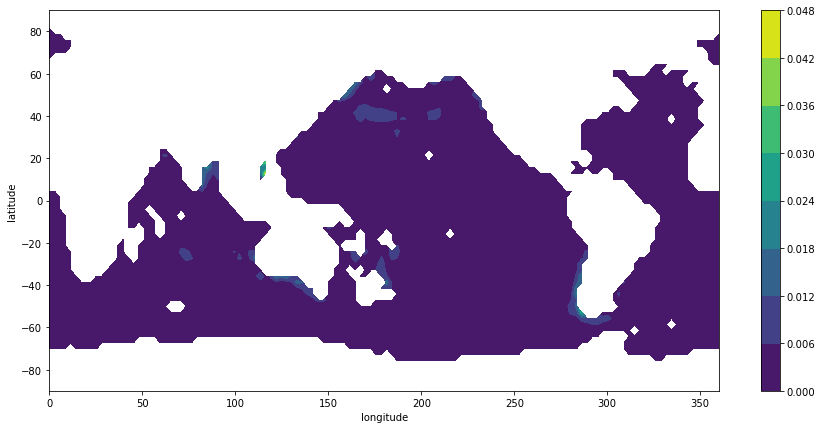

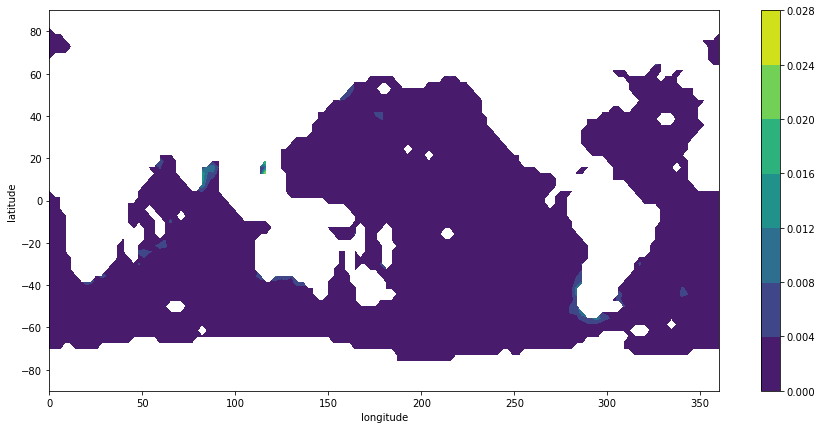

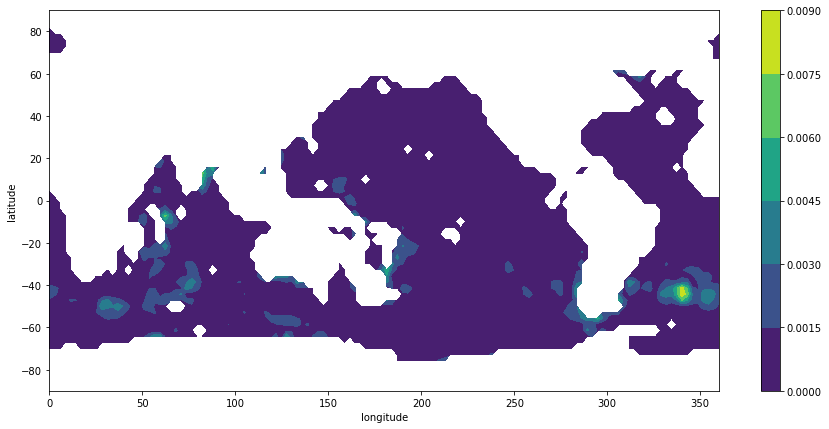

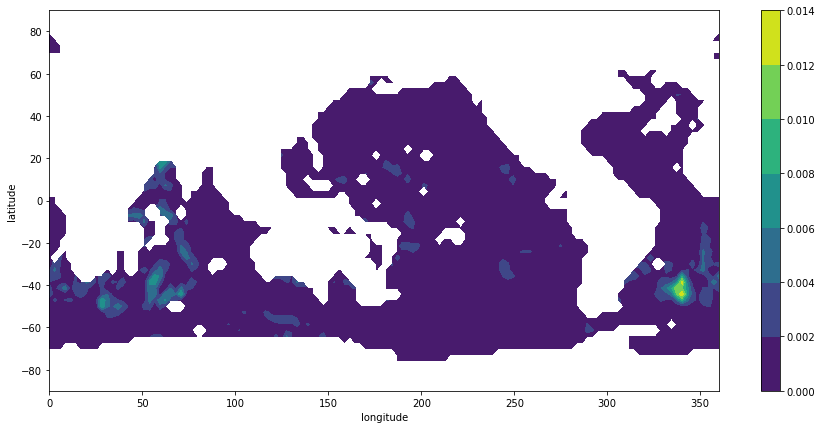

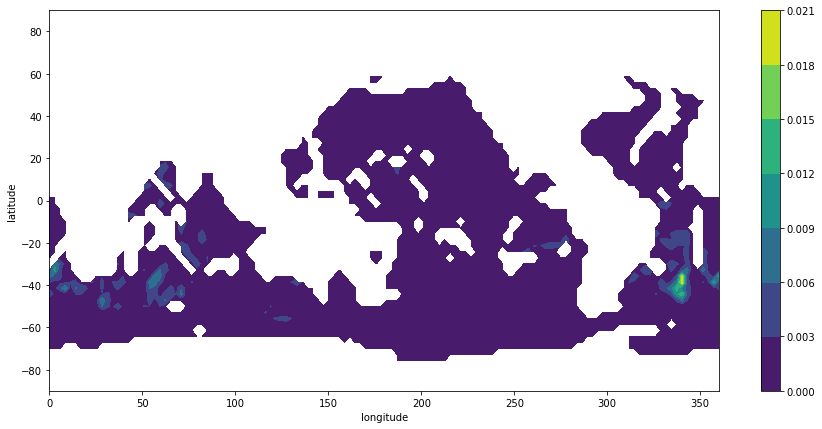

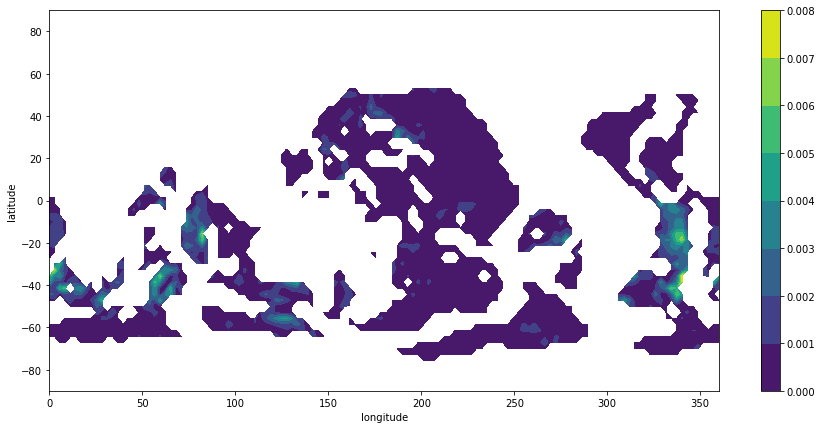

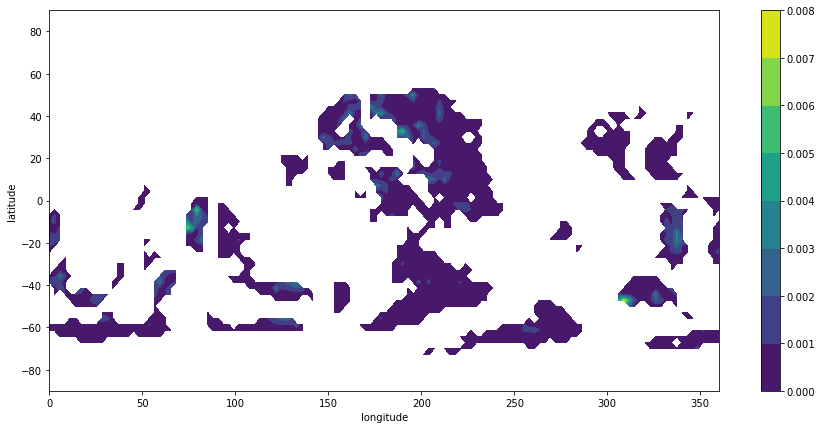

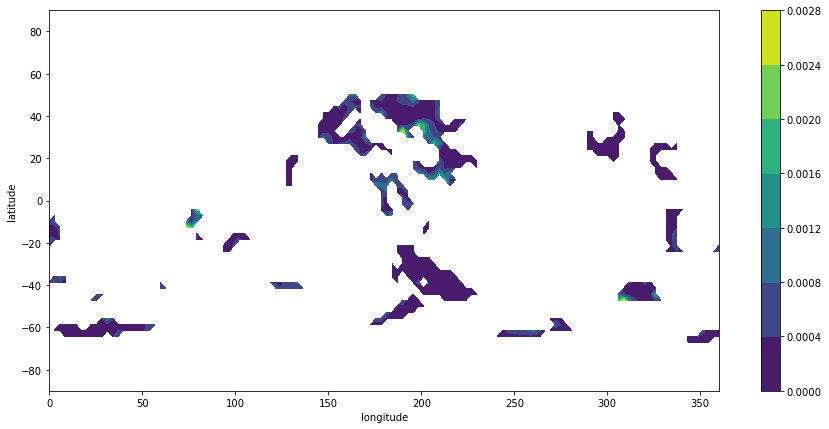

In [12]:
for i in range(15):
    fig, ax = plt.subplots(figsize= (15,7))
    long, lat = np.meshgrid(np.linspace(-90, 90, n2), np.linspace(0,360,n1))
    data = max_coef[:,:,i]
    plot = ax.contourf(lat, long, data)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    fig.colorbar(plot, ax=ax)
    plt.show()

In [13]:
abs_coef = np.abs(a_k) + np.abs(b_k)

In [14]:
abs_coef = dc.convert_2d_to_4d(abs_coef, land_sea_mask)

In [15]:
coef_per_layer = []
for layer in range(15):
    coefs = abs_coef[:,:,layer]
    data = np.zeros(1439, dtype="float")
    points = 0
    for  row in coefs:
        for point in row:
            if not point is None:
                points += 1
                data += point[1:]
    coef_per_layer.append(data/ points)

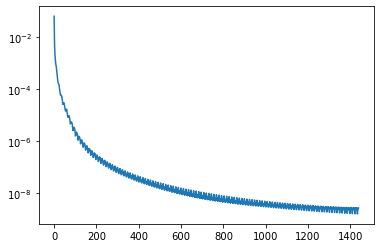

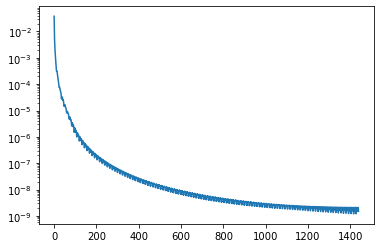

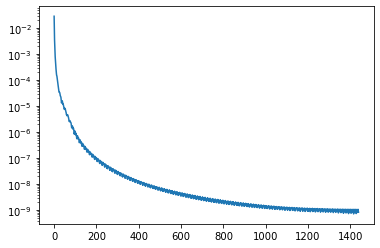

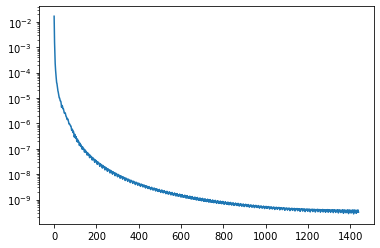

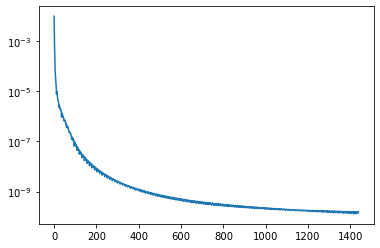

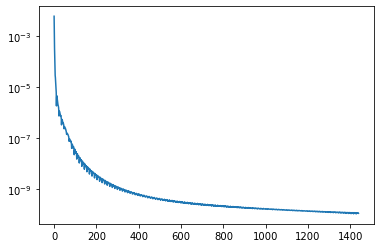

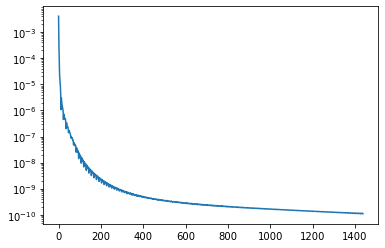

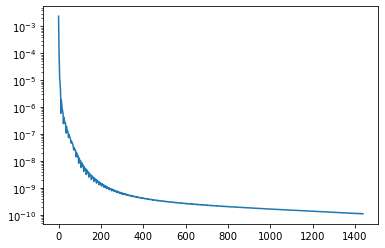

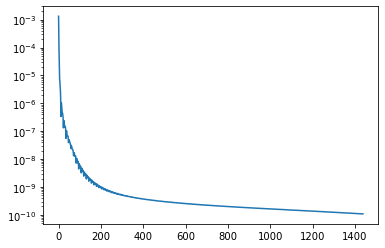

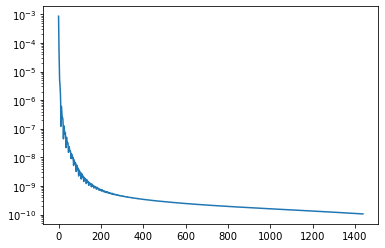

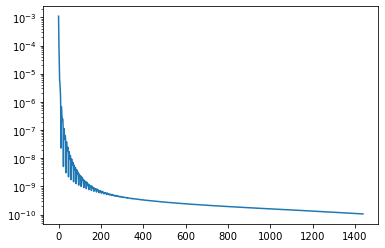

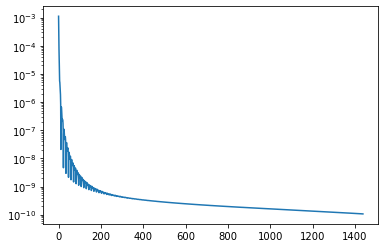

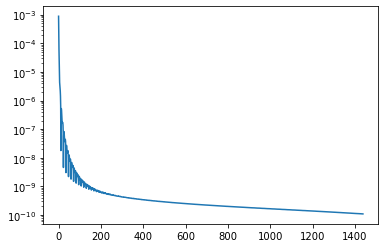

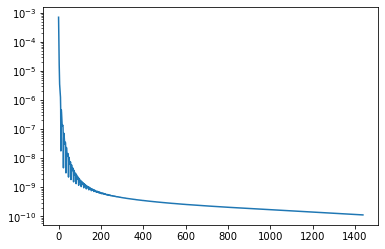

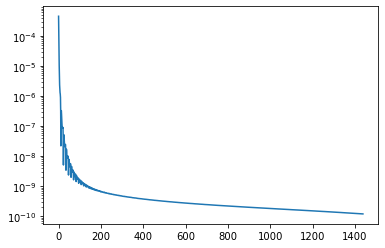

In [16]:
for i in range(15):
    plt.plot(coef_per_layer[i])
    plt.yscale('log')
    plt.show()